## Hypothesis
Predict which loans will default, focus on clients who will default.

In [1]:
import pandas as pd
import numpy as np
import os
os.listdir()

['.ipynb_checkpoints',
 'CreditRisk.ipynb',
 'CreditRisk.py',
 'Infografis.pptx',
 'LCDataDictionary.xlsx',
 'loan_data_2007_2014.csv',
 'pptB898.tmp',
 '~$Infografis.pptx']

## The Data
Data Source: Kaggle  
Url: https://www.kaggle.com/datasets/devanshi23/loan-data-2007-2014

In [2]:
loanData=pd.read_csv("loan_data_2007_2014.csv")

C:\Users\user\AppData\Local\Temp\ipykernel_20156\4157633977.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  loanData=pd.read_csv("loan_data_2007_2014.csv")


In [3]:
loanData.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
loanData.shape

(466285, 75)

In [5]:
loanData.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verificatio

In [6]:
loanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

## Target Variable
Notify that bad or good loan, need column "loan_status"

In [7]:
loanData["loan_status"].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

The bad ones are defined as 1, and the rest good are 0.  
  
Bad: 'Charged Off', 'Default', 'Late (31-120 days)',  
'Late (16-30 days)',  
'Does not meet the credit policy. Status:Charged Off' 
  
Good: Else

In [8]:
loanData["good_bad"]=np.where(loanData.loc[:,"loan_status"].isin(['Charged Off', 'Default',  
       'Late (31-120 days)', 'Late (16-30 days)',  
       'Does not meet the credit policy. Status:Charged Off']),1,0)

In [9]:
loanData["good_bad"].value_counts()

0    414099
1     52186
Name: good_bad, dtype: int64

In [10]:
loanData[["loan_status","good_bad"]]

,loan_status,good_bad
0,Fully Paid,0
1,Charged Off,1
2,Fully Paid,0
3,Fully Paid,0
4,Current,0
...,...,...
466280,Current,0
466281,Charged Off,1
466282,Current,0
466283,Fully Paid,0


In [11]:
# pd.options.display.max_columns=None

In [12]:
loanData[["loan_status","good_bad"]].value_counts()

loan_status                                          good_bad
Current                                              0           224226
Fully Paid                                           0           184739
Charged Off                                          1            42475
Late (31-120 days)                                   1             6900
In Grace Period                                      0             3146
Does not meet the credit policy. Status:Fully Paid   0             1988
Late (16-30 days)                                    1             1218
Default                                              1              832
Does not meet the credit policy. Status:Charged Off  1              761
dtype: int64

## Missing Values
Due to the large number of rows and columns, it is important to check for missing values.  
So that the model is easier to predict based on these columns

In [13]:
missing_values=pd.DataFrame(loanData.isnull().sum()/loanData.shape[0])
loanData.isnull().sum(),type(loanData.isnull().sum()),missing_values.shape

(Unnamed: 0               0
 id                       0
 member_id                0
 loan_amnt                0
 funded_amnt              0
                      ...  
 total_rev_hi_lim     70276
 inq_fi              466285
 total_cu_tl         466285
 inq_last_12m        466285
 good_bad                 0
 Length: 76, dtype: int64,
 pandas.core.series.Series,
 (76, 1))

In [14]:
missing_values=missing_values[missing_values.iloc[:,0] > 0.50]
# The missing value is above 50%

In [15]:
missing_values.shape

(21, 1)

In [16]:
missing_values

,0
desc,0.729815
mths_since_last_delinq,0.536906
mths_since_last_record,0.865666
mths_since_last_major_derog,0.787739
annual_inc_joint,1.000000
dti_joint,1.000000
verification_status_joint,1.000000
open_acc_6m,1.000000
open_il_6m,1.000000
open_il_12m,1.000000


In [17]:
missing_values.sort_values([0],ascending=False,inplace=True)
# [0] because the rows are at 0

In [18]:
missing_values

,0
open_il_24m,1.000000
mths_since_rcnt_il,1.000000
total_cu_tl,1.000000
inq_fi,1.000000
all_util,1.000000
max_bal_bc,1.000000
open_rv_24m,1.000000
open_rv_12m,1.000000
il_util,1.000000
total_bal_il,1.000000


It is better to delete the column with the missing value  
because even if you try to fill it with media, mean or other techniques for missing values
it will produce less accurate values.

In [19]:
loanData.drop(columns=missing_values.index,inplace=True)
# loanData.dropna(thresh=loanData.shape[0]*0.5,axis=1,inplace=True)

In [20]:
loanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 55 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  466285 non-null  int64  
 1   id                          466285 non-null  int64  
 2   member_id                   466285 non-null  int64  
 3   loan_amnt                   466285 non-null  int64  
 4   funded_amnt                 466285 non-null  int64  
 5   funded_amnt_inv             466285 non-null  float64
 6   term                        466285 non-null  object 
 7   int_rate                    466285 non-null  float64
 8   installment                 466285 non-null  float64
 9   grade                       466285 non-null  object 
 10  sub_grade                   466285 non-null  object 
 11  emp_title                   438697 non-null  object 
 12  emp_length                  445277 non-null  object 
 13  home_ownership

In [21]:
loanData.drop("Unnamed: 0",axis=1,inplace=True)

In [22]:
loanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 54 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          466285 non-null  int64  
 1   member_id                   466285 non-null  int64  
 2   loan_amnt                   466285 non-null  int64  
 3   funded_amnt                 466285 non-null  int64  
 4   funded_amnt_inv             466285 non-null  float64
 5   term                        466285 non-null  object 
 6   int_rate                    466285 non-null  float64
 7   installment                 466285 non-null  float64
 8   grade                       466285 non-null  object 
 9   sub_grade                   466285 non-null  object 
 10  emp_title                   438697 non-null  object 
 11  emp_length                  445277 non-null  object 
 12  home_ownership              466285 non-null  object 
 13  annual_inc    

In [23]:
missing_values=pd.DataFrame(loanData.isnull().sum()/loanData.shape[0])
missing_values=missing_values[missing_values.iloc[:,0] >0.50]
missing_values.sort_values([0],ascending=False,inplace=True)

In [24]:
missing_values

,0


Missing values sudah terhapus

## Data Splitting
Train Dataset: train a machine learning model, by learning from the patterns in this Train Data.  
Test Dataset: evaluates the machine learning model, whether when the model predicts a new data point, namely whether the test set is accurate or not.

In [25]:
loanData.shape

(466285, 54)

80% Train set dan 20% Test set

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x=loanData.drop("good_bad",axis=1)
# All columns except good_bad column target variable/responvariable (predictor).
y=loanData["good_bad"] 
# Target column, which will be predicted.

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [28]:
x_train.shape,x_test.shape

((373028, 53), (93257, 53))

In [29]:
y_train.shape,y_test.shape

((373028,), (93257,))

In [30]:
y_train.value_counts(normalize=True)

0    0.888011
1    0.111989
Name: good_bad, dtype: float64

In [31]:
y_test.value_counts(normalize=True)

0    0.888362
1    0.111638
Name: good_bad, dtype: float64

Imbalanced, where there are very few bad loans, we should have the same distribution, but the distribution is almost the same, so I will use the stratify=y parameter in the train_test_split function so that the y_train and y_test have a more equal distribution, because if they are not the same, then will affect our machine learning model.  
  
Also use the random_state=42 parameter so that when using the train_test_split function the rows will be random, that's all. So. even though we just run that, surely the results that will get random will be the same lines to make it easier to do a train test split.

In [32]:
x=loanData.drop("good_bad",axis=1)
y=loanData["good_bad"] 

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [33]:
x_train.shape,x_test.shape

((373028, 53), (93257, 53))

In [34]:
y_train.shape,y_test.shape

((373028,), (93257,))

In [35]:
y_train.value_counts(normalize=True)

0    0.888081
1    0.111919
Name: good_bad, dtype: float64

In [36]:
y_test.value_counts(normalize=True)

0    0.888083
1    0.111917
Name: good_bad, dtype: float64

So you can see that the distribution of y_train and y_test has become more the same.

## Data Cleaning

In [37]:
x_train.shape

(373028, 53)

Category or non-numeric column

In [38]:
x_train.select_dtypes(include=["object","bool"]).columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'purpose', 'title', 'zip_code', 'addr_state',
       'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'next_pymnt_d', 'last_credit_pull_d', 'application_type'],
      dtype='object')

In [39]:
for col in x_train.select_dtypes(include=["object","bool"]).columns:
    print(col)
    print(x_train[col].unique())
    print()

term
[' 60 months' ' 36 months']

grade
['C' 'D' 'A' 'B' 'E' 'F' 'G']

sub_grade
['C1' 'D1' 'A1' 'B5' 'B4' 'B2' 'B3' 'C3' 'C5' 'A4' 'E3' 'A5' 'D4' 'A3'
 'D2' 'E5' 'C4' 'D5' 'E1' 'E2' 'F3' 'B1' 'C2' 'D3' 'F1' 'F4' 'A2' 'G3'
 'E4' 'G4' 'G1' 'F5' 'F2' 'G2' 'G5']

emp_title
['Research Associate (Assistant Professor)' 'Volunteer Coordinator'
 'Plant Manger ' ... 'AMR Group' 'Dallas Can Academy' 'Tax Return Center']

emp_length
['9 years' '2 years' '10+ years' '1 year' '< 1 year' '8 years' nan
 '6 years' '3 years' '4 years' '5 years' '7 years']

home_ownership
['MORTGAGE' 'RENT' 'OWN' 'OTHER' 'NONE' 'ANY']

verification_status
['Verified' 'Not Verified' 'Source Verified']

issue_d
['Jul-14' 'Oct-13' 'Mar-14' 'Oct-14' 'Aug-11' 'Aug-12' 'Apr-13' 'Nov-07'
 'Jun-12' 'Jul-08' 'Jun-14' 'Sep-13' 'Jul-13' 'May-13' 'Feb-12' 'Jun-10'
 'Jun-13' 'Apr-14' 'Jul-12' 'Aug-14' 'Nov-13' 'Jan-14' 'Dec-13' 'Dec-14'
 'Feb-14' 'Dec-12' 'May-11' 'Nov-12' 'Sep-14' 'Feb-13' 'Nov-14' 'Sep-11'
 'Jan-13' 'May-14' 'Jun-

['Jan-16' nan 'Feb-16' 'Sep-11' 'Sep-12' 'Nov-09' 'Mar-09' 'Jun-12'
 'Dec-12' 'Feb-11' 'Jul-12' 'Apr-11' 'Oct-09' 'Dec-13' 'Feb-12' 'Jan-13'
 'Feb-10' 'Nov-15' 'Feb-13' 'Apr-13' 'Oct-13' 'Feb-09' 'Dec-10' 'May-10'
 'Aug-08' 'Mar-12' 'Jul-10' 'Jan-11' 'Jun-11' 'Jun-09' 'Mar-10' 'Dec-09'
 'Aug-13' 'Mar-11' 'Aug-09' 'Jan-09' 'Aug-12' 'May-11' 'Dec-11' 'Oct-10'
 'Nov-11' 'Jul-11' 'Oct-11' 'Sep-09' 'Aug-11' 'Oct-12' 'Jul-14' 'Sep-14'
 'Jan-12' 'Mar-16' 'May-12' 'Apr-12' 'May-13' 'May-15' 'Nov-10' 'Mar-13'
 'Jul-09' 'Dec-15' 'Jun-13' 'Jun-08' 'Nov-13' 'Apr-10' 'Aug-10' 'Sep-15'
 'Apr-09' 'May-14' 'Sep-10' 'Oct-15' 'Aug-15' 'Apr-15' 'Mar-14' 'Dec-08'
 'Jul-13' 'Nov-08' 'Jan-14' 'Nov-12' 'Jan-10' 'Jan-15' 'Jun-10' 'Aug-14'
 'May-09' 'Oct-08' 'Dec-14' 'Sep-13' 'Jul-08' 'Oct-14' 'Sep-08' 'Jan-08'
 'May-08' 'Feb-15' 'Jul-15' 'Feb-14' 'Nov-14' 'Dec-07' 'Feb-08' 'Apr-08'
 'Jun-15' 'Jun-14' 'Mar-08' 'Apr-14']

last_credit_pull_d
['Jan-16' 'May-14' 'Mar-15' 'Apr-15' 'Aug-11' 'Dec-13' 'Jul-13' 'Mar-14

term : should be numeric  
emp_length : should be numeric  
issue_d, earliest_cr_line, last_pymnt_d, next_pymnt_d, last_credit_pull_d : should be datetime

In [40]:
col_to_clean=["term","emp_length","issue_d","earliest_cr_line",
              "last_pymnt_d","next_pymnt_d","last_credit_pull_d"]

In [41]:
x_train["term"].unique()

array([' 60 months', ' 36 months'], dtype=object)

In [42]:
x_train["term"]=x_train["term"].str.replace(" months","")
x_train["term"]=x_train["term"].str.replace(" ","")

In [43]:
x_train["term"]=x_train["term"].astype(int)

In [44]:
x_train["term"]

335623    60
82177     36
339560    36
429575    36
264917    36
          ..
85335     36
400460    36
3982      60
280424    36
354718    36
Name: term, Length: 373028, dtype: int32

In [45]:
x_train["emp_length"]

335623      9 years
82177       2 years
339560    10+ years
429575    10+ years
264917       1 year
            ...    
85335       2 years
400460      4 years
3982        4 years
280424       1 year
354718     < 1 year
Name: emp_length, Length: 373028, dtype: object

In [46]:
x_train.shape

(373028, 53)

In [47]:
# "Length of work in years. Possible values are between 0 and 10
# where 0 means less than one year and 10 means ten years or more."

x_train["emp_length"]=x_train["emp_length"].str.replace("\+ years","")
x_train["emp_length"]=x_train["emp_length"].str.replace(" years","")
x_train["emp_length"]=x_train["emp_length"].str.replace("< 1 year","0")
x_train["emp_length"]=x_train["emp_length"].str.replace(" year","")

# You can fill it with a value of 0, and here I apply this.
x_train["emp_length"].fillna(0,inplace=True)


C:\Users\user\AppData\Local\Temp\ipykernel_20156\1794373968.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  x_train["emp_length"]=x_train["emp_length"].str.replace("\+ years","")


In [48]:
x_train["emp_length"]

335623     9
82177      2
339560    10
429575    10
264917     1
          ..
85335      2
400460     4
3982       4
280424     1
354718     0
Name: emp_length, Length: 373028, dtype: object

In [49]:
x_train.shape

(373028, 53)

In [50]:
x_train["emp_length"].unique()

array(['9', '2', '10', '1', '0', '8', 0, '6', '3', '4', '5', '7'],
      dtype=object)

In [51]:
x_train["emp_length"]=x_train["emp_length"].astype(int)

In [52]:
x_train["emp_length"]

335623     9
82177      2
339560    10
429575    10
264917     1
          ..
85335      2
400460     4
3982       4
280424     1
354718     0
Name: emp_length, Length: 373028, dtype: int32

In [53]:
col_to_clean

['term',
 'emp_length',
 'issue_d',
 'earliest_cr_line',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d']

In [54]:
col_date=['issue_d',
 'earliest_cr_line',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d']

In [55]:
x_train[col_date]

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
335623,Jul-14,Apr-92,Jan-16,Jan-16,Jan-16
82177,Oct-13,Oct-94,Dec-13,NaN,May-14
339560,Jul-14,Mar-94,Mar-15,NaN,Mar-15
429575,Mar-14,Feb-00,Aug-15,NaN,Jan-16
264917,Oct-14,Mar-01,Oct-15,Jan-16,Jan-16
...,...,...,...,...,...
85335,Sep-13,Jun-89,Jan-16,Jan-16,Jan-16
400460,Apr-14,Aug-99,Jan-16,Feb-16,Jan-16
3982,Nov-11,Feb-03,Jun-12,NaN,Nov-12
280424,Oct-14,Jul-92,Jan-16,Jan-16,Jan-16


In [56]:
# x_train["issue_d"]=pd.to_datetime(x_train["issue_d"],format="%b-%y")

In [57]:
# x_train["issue_d"]

In [58]:
for col in col_date:
    x_train[col]=pd.to_datetime(x_train[col],format="%b-%y")

In [59]:
x_train[col_to_clean]

,term,emp_length,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
335623,60,9,2014-07-01,1992-04-01,2016-01-01,2016-01-01,2016-01-01
82177,36,2,2013-10-01,1994-10-01,2013-12-01,NaT,2014-05-01
339560,36,10,2014-07-01,1994-03-01,2015-03-01,NaT,2015-03-01
429575,36,10,2014-03-01,2000-02-01,2015-08-01,NaT,2016-01-01
264917,36,1,2014-10-01,2001-03-01,2015-10-01,2016-01-01,2016-01-01
...,...,...,...,...,...,...,...
85335,36,2,2013-09-01,1989-06-01,2016-01-01,2016-01-01,2016-01-01
400460,36,4,2014-04-01,1999-08-01,2016-01-01,2016-02-01,2016-01-01
3982,60,4,2011-11-01,2003-02-01,2012-06-01,NaT,2012-11-01
280424,36,1,2014-10-01,1992-07-01,2016-01-01,2016-01-01,2016-01-01


In [60]:
x_test["term"]=x_test["term"].str.replace(" months","")
x_test["term"]=x_test["term"].str.replace(" ","")
x_test["term"]=x_test["term"].astype(int)

x_test["emp_length"]=x_test["emp_length"].str.replace("\+ years","")
x_test["emp_length"]=x_test["emp_length"].str.replace(" years","")
x_test["emp_length"]=x_test["emp_length"].str.replace("< 1 year","0")
x_test["emp_length"]=x_test["emp_length"].str.replace(" year","")
x_test["emp_length"].fillna(0,inplace=True)
x_test["emp_length"]=x_test["emp_length"].astype(int)

for col in col_date:
    x_test[col]=pd.to_datetime(x_test[col],format="%b-%y")


C:\Users\user\AppData\Local\Temp\ipykernel_20156\3256057724.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  x_test["emp_length"]=x_test["emp_length"].str.replace("\+ years","")


In [61]:
x_test[col_to_clean].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93257 entries, 38664 to 89759
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   term                93257 non-null  int32         
 1   emp_length          93257 non-null  int32         
 2   issue_d             93257 non-null  datetime64[ns]
 3   earliest_cr_line    93252 non-null  datetime64[ns]
 4   last_pymnt_d        93187 non-null  datetime64[ns]
 5   next_pymnt_d        47770 non-null  datetime64[ns]
 6   last_credit_pull_d  93246 non-null  datetime64[ns]
dtypes: datetime64[ns](5), int32(2)
memory usage: 5.0 MB


## Feature Engineering
Generates a new column from existing columns.

In [62]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((373028, 53), (373028,), (93257, 53), (93257,))

In [63]:
col_to_clean

['term',
 'emp_length',
 'issue_d',
 'earliest_cr_line',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d']

In [64]:
x_train[col_to_clean]

,term,emp_length,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
335623,60,9,2014-07-01,1992-04-01,2016-01-01,2016-01-01,2016-01-01
82177,36,2,2013-10-01,1994-10-01,2013-12-01,NaT,2014-05-01
339560,36,10,2014-07-01,1994-03-01,2015-03-01,NaT,2015-03-01
429575,36,10,2014-03-01,2000-02-01,2015-08-01,NaT,2016-01-01
264917,36,1,2014-10-01,2001-03-01,2015-10-01,2016-01-01,2016-01-01
...,...,...,...,...,...,...,...
85335,36,2,2013-09-01,1989-06-01,2016-01-01,2016-01-01,2016-01-01
400460,36,4,2014-04-01,1999-08-01,2016-01-01,2016-02-01,2016-01-01
3982,60,4,2011-11-01,2003-02-01,2012-06-01,NaT,2012-11-01
280424,36,1,2014-10-01,1992-07-01,2016-01-01,2016-01-01,2016-01-01


In [65]:
x_train=x_train[col_to_clean]
x_test=x_test[col_to_clean]

In [66]:
del x_train["next_pymnt_d"]
del x_test["next_pymnt_d"]
# For the column next_pymnt_d, i.e. the next payment time doesn't really matter here
# even when you pay.
# So it can just be deleted, and the data used is a column other than the next_pymnt_d.

In [67]:
x_train.shape,x_test.shape

((373028, 6), (93257, 6))

In [68]:
x_train

,term,emp_length,issue_d,earliest_cr_line,last_pymnt_d,last_credit_pull_d
335623,60,9,2014-07-01,1992-04-01,2016-01-01,2016-01-01
82177,36,2,2013-10-01,1994-10-01,2013-12-01,2014-05-01
339560,36,10,2014-07-01,1994-03-01,2015-03-01,2015-03-01
429575,36,10,2014-03-01,2000-02-01,2015-08-01,2016-01-01
264917,36,1,2014-10-01,2001-03-01,2015-10-01,2016-01-01
...,...,...,...,...,...,...
85335,36,2,2013-09-01,1989-06-01,2016-01-01,2016-01-01
400460,36,4,2014-04-01,1999-08-01,2016-01-01,2016-01-01
3982,60,4,2011-11-01,2003-02-01,2012-06-01,2012-11-01
280424,36,1,2014-10-01,1992-07-01,2016-01-01,2016-01-01


To input the data into the model, it is necessary to convert it into numbers for the columns.


In [69]:
from datetime import date

def date_columns(df,column):
    df["months_since_"+column]=round((pd.to_datetime("2017-12-01")-df[column])/np.timedelta64(1,"M"))
    df.drop(columns=column,inplace=True)

 # Apply to x_train    
date_columns(x_train,"issue_d")
date_columns(x_train,"earliest_cr_line")
date_columns(x_train,"last_pymnt_d")
date_columns(x_train,"last_credit_pull_d")

In [70]:
x_train

,term,emp_length,months_since_issue_d,months_since_earliest_cr_line,months_since_last_pymnt_d,months_since_last_credit_pull_d
335623,60,9,41.0,308.0,23.0,23.0
82177,36,2,50.0,278.0,48.0,43.0
339560,36,10,41.0,285.0,33.0,33.0
429575,36,10,45.0,214.0,28.0,23.0
264917,36,1,38.0,201.0,26.0,23.0
...,...,...,...,...,...,...
85335,36,2,51.0,342.0,23.0,23.0
400460,36,4,44.0,220.0,23.0,23.0
3982,60,4,73.0,178.0,66.0,61.0
280424,36,1,38.0,305.0,23.0,23.0


In [71]:
# Apply to x_test
date_columns(x_test,"issue_d")
date_columns(x_test,"earliest_cr_line")
date_columns(x_test,"last_pymnt_d")
date_columns(x_test,"last_credit_pull_d")

In [72]:
x_test.isnull().sum(),x_train.isnull().sum()
# It turned out that there were still missing values, so the missing values were filled in.

(term                                0
 emp_length                          0
 months_since_issue_d                0
 months_since_earliest_cr_line       5
 months_since_last_pymnt_d          70
 months_since_last_credit_pull_d    11
 dtype: int64,
 term                                 0
 emp_length                           0
 months_since_issue_d                 0
 months_since_earliest_cr_line       24
 months_since_last_pymnt_d          306
 months_since_last_credit_pull_d     31
 dtype: int64)

In [73]:
x_train.fillna(x_train.mean(),inplace=True)
x_test.fillna(x_train.mean(),inplace=True)

In [74]:
x_train.isnull().sum(),x_train.isnull().sum()

(term                               0
 emp_length                         0
 months_since_issue_d               0
 months_since_earliest_cr_line      0
 months_since_last_pymnt_d          0
 months_since_last_credit_pull_d    0
 dtype: int64,
 term                               0
 emp_length                         0
 months_since_issue_d               0
 months_since_earliest_cr_line      0
 months_since_last_pymnt_d          0
 months_since_last_credit_pull_d    0
 dtype: int64)

## Modelling
Target:  
1 --> (Probability Approaching 1 ) Default (Bad Loan)  
0 --> (Probability Close to 0 ) Successfully Pay (Good Loan)

In [75]:
# Starting from a simple model
from sklearn.linear_model import LogisticRegression

In [76]:
model=LogisticRegression()

In [77]:
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [78]:
result=pd.DataFrame(list(zip(y_pred,y_test)),columns=["y_pred","y_test"])
result.head()

,y_pred,y_test
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [79]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8854777657441264

In [80]:
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
cm=confusion_matrix(y_test,y_pred)

In [82]:
cm

array([[82168,   652],
       [10028,   409]], dtype=int64)

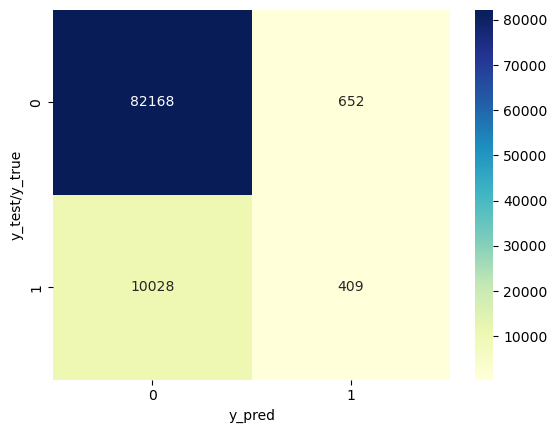

In [83]:
sns.heatmap(cm,annot=True,fmt=".0f",cmap=plt.cm.YlGnBu)
plt.xlabel("y_pred")
plt.ylabel("y_test/y_true")
plt.show()

In [84]:
y_train.value_counts(normalize=True)

0    0.888081
1    0.111919
Name: good_bad, dtype: float64

Because, in this case there is an imbalanced class distribution, because there are very many 0 values and few 1 values. Therefore, we cannot use accuracy_score to measure the performance of our model in this case, because it might be misleading.

In [85]:
y_pred=model.predict_proba(x_test)[:,1]
y_pred

array([0.11681093, 0.08346401, 0.02043356, ..., 0.25642323, 0.05570536,
       0.15428657])

In [86]:
(y_pred>0.5).astype(int)

array([0, 0, 0, ..., 0, 0, 0])

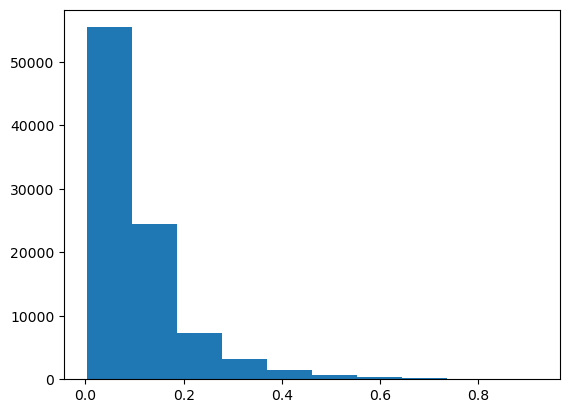

In [87]:
plt.hist(y_pred);

Calculating the best threshold

In [88]:
from sklearn.metrics import roc_curve

In [89]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred)

In [90]:
thresholds

array([       inf, 0.92052362, 0.87654685, ..., 0.00630936, 0.00439174,
       0.00236468])

In [91]:
# Youden j-statistic
j=tpr-fpr
ix=np.argmax(j)
best_thresh=thresholds[ix]

In [92]:
best_thresh

0.09066053853328147

In [93]:
model.predict_proba(x_test) # Class 0, class 1

array([[0.88318907, 0.11681093],
       [0.91653599, 0.08346401],
       [0.97956644, 0.02043356],
       ...,
       [0.74357677, 0.25642323],
       [0.94429464, 0.05570536],
       [0.84571343, 0.15428657]])

In [94]:
y_pred=model.predict_proba(x_test)[:,1]

In [95]:
y_pred

array([0.11681093, 0.08346401, 0.02043356, ..., 0.25642323, 0.05570536,
       0.15428657])

In [105]:
y_pred=(y_pred>best_thresh).astype(int)

If we predict a loan above 0.09 (9%) it is very likely that the loan will default.  
However, if it is below 0.09 (9%), it is likely that the loan will be successfully paid.

In [ ]:
plt.hist(y_pred);

In [98]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[51498, 31322],
       [ 2313,  8124]], dtype=int64)

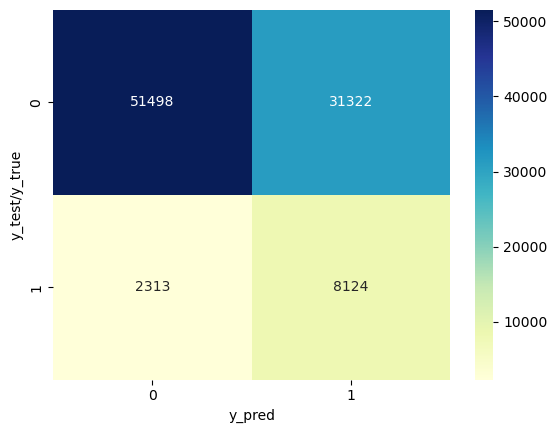

In [99]:
sns.heatmap(cm,annot=True,fmt=".0f",cmap=plt.cm.YlGnBu)
plt.xlabel("y_pred")
plt.ylabel("y_test/y_true")
plt.show()

In [100]:
model.intercept_

array([-3.0715481])

In [101]:
model.coef_

array([[ 0.02610462, -0.01167663, -0.05493298, -0.00106052,  0.09907372,
        -0.01248464]])

In [102]:
df_coeff=pd.DataFrame(model.coef_,columns=x_train.columns)
df_coeff

,term,emp_length,months_since_issue_d,months_since_earliest_cr_line,months_since_last_pymnt_d,months_since_last_credit_pull_d
0,0.026105,-0.011677,-0.054933,-0.001061,0.099074,-0.012485


In [103]:
x_train.head()

,term,emp_length,months_since_issue_d,months_since_earliest_cr_line,months_since_last_pymnt_d,months_since_last_credit_pull_d
335623,60,9,41.0,308.0,23.0,23.0
82177,36,2,50.0,278.0,48.0,43.0
339560,36,10,41.0,285.0,33.0,33.0
429575,36,10,45.0,214.0,28.0,23.0
264917,36,1,38.0,201.0,26.0,23.0


- term: the longer the timeframe for repaying the loan, the higher the probability that he will default.  
- emp_length: the higher, the lower the probability of default.  
- months_since_issue_d: the longer the disbursed money, the lower the probability of default.  
- months_since_earlist_cr_line: the longer it is an hour since the credit creation date, the lower the probability of default. (If the age of the credit line is old, it means that the probability of default is lower).  
- months_since_last_pymnt_d: the longer the last payment, the higher the probability that he will default.
- months_since_last_credit_pull_d: the longer the last credit evaluation, the higher the probability that he will default. (So we have to evaluate it routinely, because if we routinely carry out evaluations, it means that the difference between the last evaluation date and the current date is getting smaller, therefore, the probability that he will fail to pay will be smaller).